In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()


Saving Dataset3.csv to Dataset3.csv


In [ ]:
import io
data=pd.read_csv(io.BytesIO(uploaded['Dataset3.csv']),header=None)
data

,0,1
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


In [ ]:
df=data.values.tolist()
#print(np.mean(data,axis=0))
avg = np.full(data.shape,np.mean(data,axis=0))
df=np.subtract(df,avg)
sd = np.full(data.shape,np.std(df, axis = 0))
df=np.divide(df,sd)
df


array([[ 0.03721355,  0.23990329],
       [-0.07928601,  0.24007136],
       [ 0.12133462, -0.20460953],
       ...,
       [ 1.58904894, -1.45813149],
       [-1.92818785, -1.34465036],
       [-0.03369538, -2.14432818]])

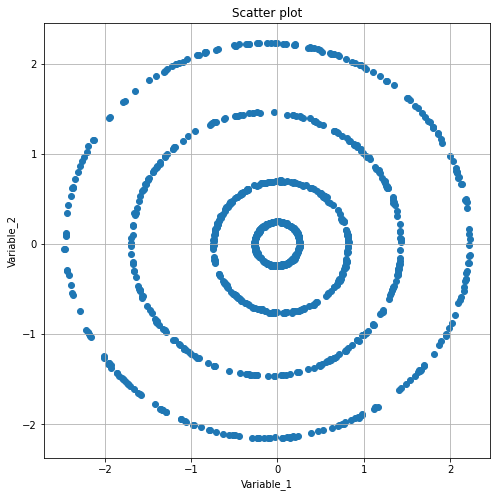

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(*zip(*df))
plt.title('Scatter plot')
plt.xlabel('Variable_1')
plt.ylabel('Variable_2')
plt.grid(True)
plt.show()

In [ ]:
df_trans=df.T
cov=np.cov(df_trans)
cov

array([[1.001001  , 0.05132212],
       [0.05132212, 1.001001  ]])

In [ ]:
w,v=np.linalg.eig(cov)
id=np.argsort(w)[::-1]
w=w[id]
v=v[:,id]
print('Eigen Values',w[:2])
print('Eigen Vectors')
print (v)

Eigen Values [1.05232312 0.94967888]
Eigen Vectors
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
prop_of_var=[]
for i in range(0,len(w)):
 prop_of_var.append(w[i]/np.sum(w))
print ('Proporion of variance explained:')
for i in range(0,len(w)):
  print ('Direction',i,':',prop_of_var[i])

Proporion of variance explained:
Direction 0 : 0.5256353980349302
Direction 1 : 0.47436460196506974


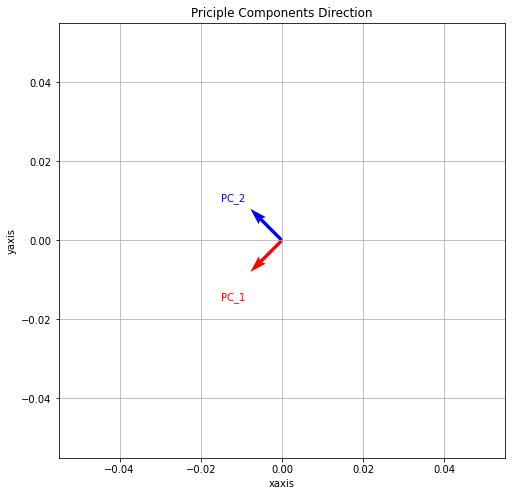

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Priciple Components Direction')
plt.quiver(*[0,0], *v[0], color=['r'],scale=10,label='PC_1')
plt.quiver(*[0,0], *v[1], color=['b'], scale=10,label='PC_2')
plt.text(-0.015,-0.015, 'PC_1', color='red', fontsize=10)
plt.text(-0.015,0.010, 'PC_2', color='blue', fontsize=10)
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.grid(True)
plt.show()

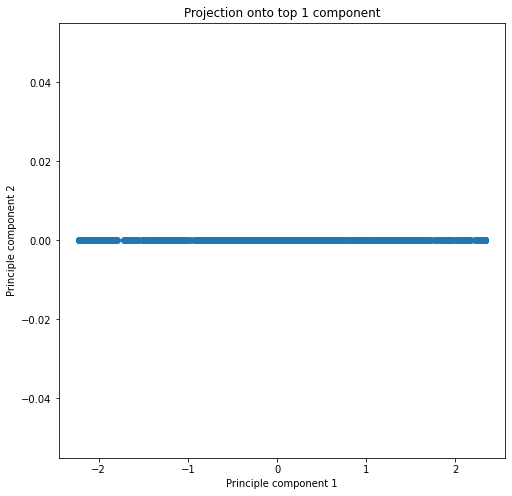

In [ ]:
Z=np.matmul(v.T,df_trans)
plt.figure(figsize=(8,8))
plt.title('Projection onto top 1 component')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.scatter(Z[0].T,[0]*len(Z[0]))
plt.show()

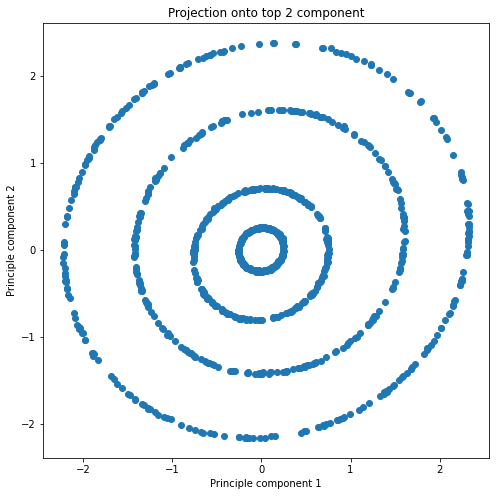

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Projection onto top 2 component')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.scatter(Z[0].T,Z[1].T)
plt.show()